In [28]:
import numpy as np
import pandas as pd
import os


In [29]:
data = pd.read_csv("./train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1) PassengerId
2) Pclacss [SELECTED]
4) Name
5) Sex [SELECTED]
6) Age[SELECTED]
7) SibSp [SELECTED]
8) Parch [SELECTED]
9) Ticket
10) Fare [SELECTED]
11) Cabin
12) Embarked [SELECTED]

In [30]:
# Visualising the survival rate of the passengers. For that creating a bar plot function values of Survived 1 or 0
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))


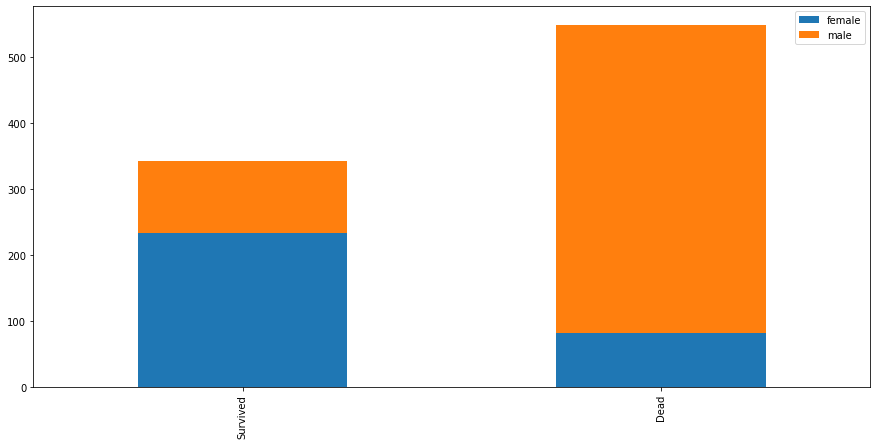

In [31]:
# Visualising data as per Sex:
bar_chart('Sex')

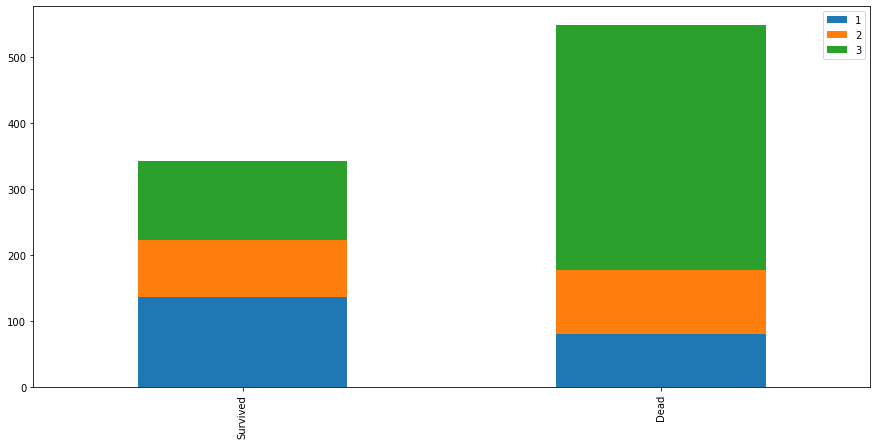

In [32]:
# Visualising as per Passenger Class:
bar_chart('Pclass')

In [33]:
# Taking selected values and adding it to the feature list
features = ['Pclass','Age','Sex','SibSp','Parch','Embarked']
x= data[features]
y=data['Survived']

In [34]:
# Checking the null values
x.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [35]:
# removing null values using a mean value from male ages. Embarked column has only 2 so skipping
my_mean= x[(~x["Age"].isna())&(x["Sex"]=='male')]["Age"].mean()

In [36]:
x.loc[(x["Age"].isna())&(x["Sex"]=='male'),"Age"]= my_mean
x.loc[(x["Age"].isna())&(x["Sex"]=='female'),"Age"]= my_mean

/Users/shonitgangoly/Documents/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [37]:
# Filling 'String' based columns with a dummy integer value
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x['Embarked'] = LE.fit_transform(x['Embarked'])

<ipython-input-37-45c1852e3b5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = LE.fit_transform(x['Sex'])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

1) Splitting data into Training and Testing
2) Here test_size denotes the percentage of data chosen for testing that is 30%
3) Random state denotes from where the data should be picked so that when multiple instances of the data is chosen, next iteration knows where to start from to reduce discrepancy

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =40)

1) Fitting my model here
2) Using ADA Boost Classifier. It uses the concept of decision trees but in a much faster and efficient method when concerned with tabular data

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [40]:
clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'S'

In [41]:
clf.score(x_test, y_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

ValueError: could not convert string to float: 'S'

# Preparing Test data set

In [43]:
test_data = pd.read_csv('./test.csv')
test_x = test_data[features]

In [44]:
test_x

,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,34.5,male,0,0,Q
1,3,47.0,female,1,0,S
2,2,62.0,male,0,0,Q
3,3,27.0,male,0,0,S
4,3,22.0,female,1,1,S
...,...,...,...,...,...,...
413,3,NaN,male,0,0,S
414,1,39.0,female,0,0,C
415,3,38.5,male,0,0,S
416,3,NaN,male,0,0,S


In [45]:
# Filling the missing values
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())


<ipython-input-45-933eaf24c3eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())


In [46]:
# Encoding string values
test_x['Sex'] = LE.fit_transform(test_x['Sex'])
test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])

<ipython-input-46-bc846fd1c7ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Sex'] = LE.fit_transform(test_x['Sex'])
<ipython-input-46-bc846fd1c7ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])


In [47]:
# Predicting the values
prediction = clf.predict(test_x)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [48]:
#Storing a prediction in csv file for submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
output.head()

NameError: name 'prediction' is not defined

In [49]:
reg_predict= logreg.predict(test_x)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': reg_predict})
output.to_csv('submission_Logistic_Regression.csv', index=False)
output.head()

NameError: name 'reg_predict' is not defined